# Setup

In [1]:
from homophily_analysis_tools.datasets import *
from homophily_analysis_tools.spl_tools import *
from homophily_analysis_tools.homophily_metrics import *
from homophily_analysis_tools.gnn_models import *
from homophily_analysis_tools.generate_synthetic_graphs import *
from homophily_analysis_tools.plot_tools import *

In [2]:
def colab_setup(is_colab=False):
    "Run if using Google Colab"
    if is_colab:
        from google.colab import drive
        drive.mount('/content/drive')
        %cd /content/drive/MyDrive/M4R/Homophily_Analysis/Homophily_Analysis
        import torch
        %pip install torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
        %pip install torch-geometric==2.1.0
        %pip install dive-into-graphs
        %pip install dgl-cu113 dglgo -f https://data.dgl.ai/wheels/repo.html
    return

In [3]:
colab_setup(is_colab=False)

In [4]:
import dgl
import torch
import torch.nn as nn
import torch.nn.functional as F
import copy
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import os
import pandas as pd
import torch_geometric
import warnings
from tqdm import tqdm
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score
warnings.simplefilter("ignore")
import dgl.data
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader

In [5]:
warnings.simplefilter("ignore")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

## Load Datasets

In [6]:
dataset1 = NewCoraGraphDataset() 
g1 = dataset1[0]
G1 = nx.Graph(dgl.to_networkx(g1))

dataset2 = NewCiteseerGraphDataset() 
g2 = dataset2[0]
G2 = nx.Graph(dgl.to_networkx(g2))

dataset3 = NewPubmedGraphDataset()
g3 = dataset3[0]
G3 = nx.Graph(dgl.to_networkx(g3))

dataset4 = AmazonDatasetGraphDataset()
g4 = dataset4[1]
#G4 = nx.Graph(dgl.to_networkx(g4))

dataset5 = ActorGraphDataset()
g5 = dataset5[0]
G5 = nx.Graph(dgl.to_networkx(g5))

dataset6 = LINKXDatasetGraphDataset()
g6 = dataset6[0]
#G6 = nx.Graph(dgl.to_networkx(g6))


  NumNodes: 2708
  NumEdges: 10556
  NumFeats: 1433
  NumClasses: 7
  NumTrainingSamples: 140
  NumValidationSamples: 500
  NumTestSamples: 1000
Done loading data from cached files.
  NumNodes: 3327
  NumEdges: 9228
  NumFeats: 3703
  NumClasses: 6
  NumTrainingSamples: 120
  NumValidationSamples: 500
  NumTestSamples: 1000
Done loading data from cached files.
  NumNodes: 19717
  NumEdges: 88651
  NumFeats: 500
  NumClasses: 3
  NumTrainingSamples: 60
  NumValidationSamples: 500
  NumTestSamples: 1000
Done loading data from cached files.


100%|██████████| 5/5 [00:19<00:00,  3.82s/it]


In [7]:
n0 = 100
g0_homo = gen_complete_homophilic_graph(n0,k=10)
g0_hetero = gen_complete_heterophilic_graph(n0,k=10)

# Graph Plots

### Real

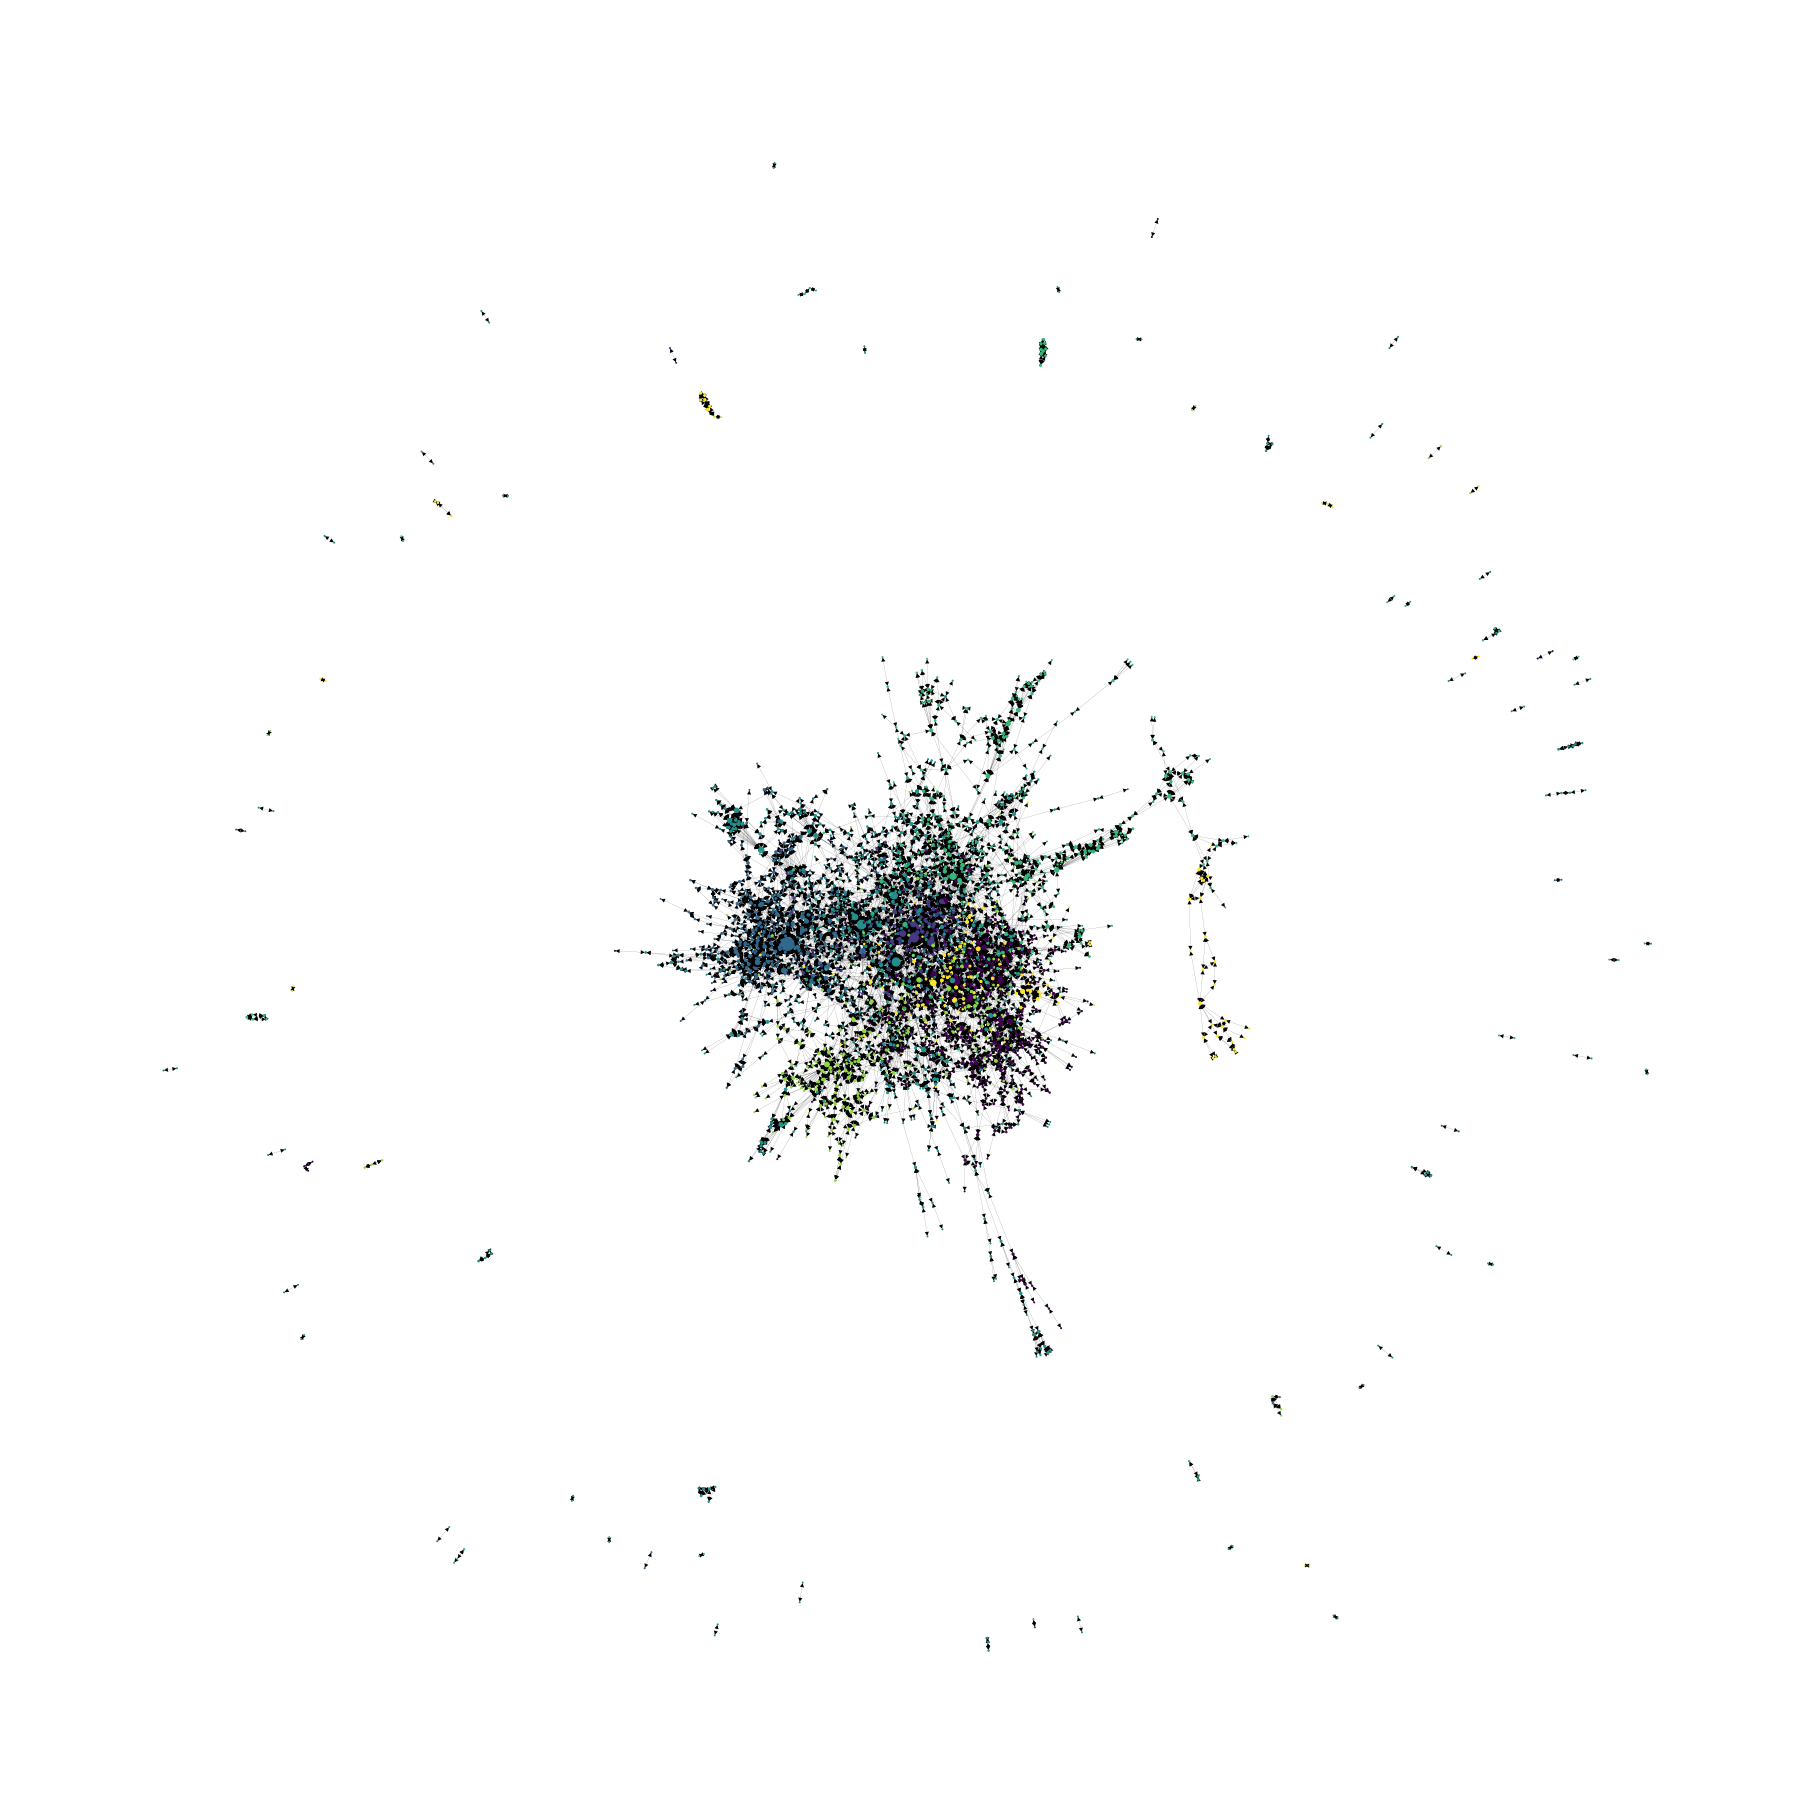

In [ ]:
plt.figure(1,figsize=(25,25)) 
nx.draw(g1.to_networkx(), alpha = 1, node_size = g1.in_degrees(), node_color = g1.ndata['label'], width=0.05)
plt.show()

### Generated

In [126]:
g_SBM_synth_list = gen_synthetic_SBM_graph_list(g5,k=2,extreme_scale=50)

100%|██████████| 8/8 [00:41<00:00,  5.21s/it]


In [ ]:
g_synth_list = gen_synthetic_rewired_graph(g1,h=0.1)

1/20) 0.8220469951629639
2/20) 0.7815309166908264
3/20) 0.7406962513923645
4/20) 0.6968477964401245
5/20) 0.6556210517883301
6/20) 0.6129036545753479
7/20) 0.5714105367660522
8/20) 0.5292209386825562
9/20) 0.4838157892227173
10/20) 0.43607375025749207
11/20) 0.3872841000556946
12/20) 0.3406006097793579
13/20) 0.29113879799842834
14/20) 0.24269942939281464


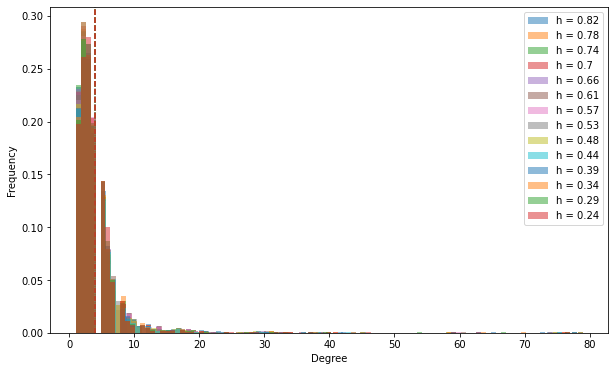

In [ ]:
plot_degree_distribution_comparison(g_synth_list)

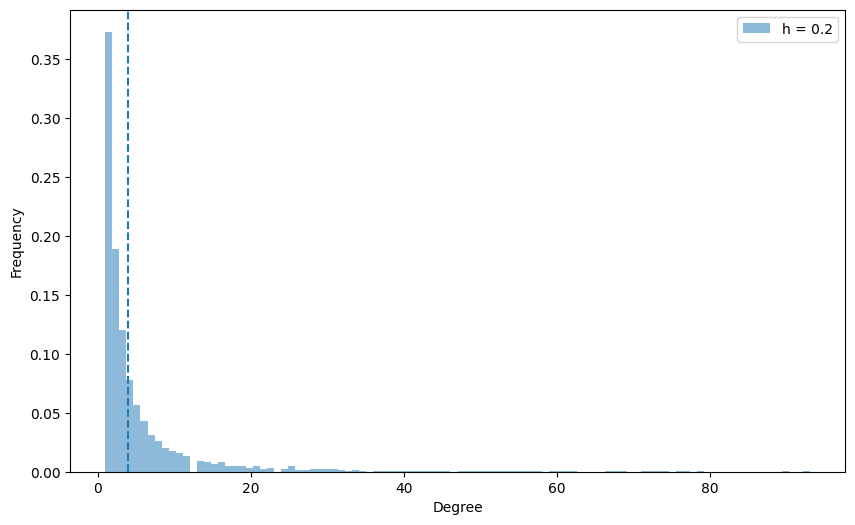

In [ ]:
plot_degree_distribution_comparison([g5])

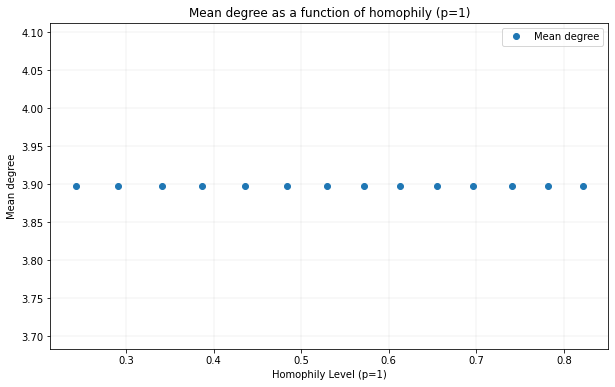

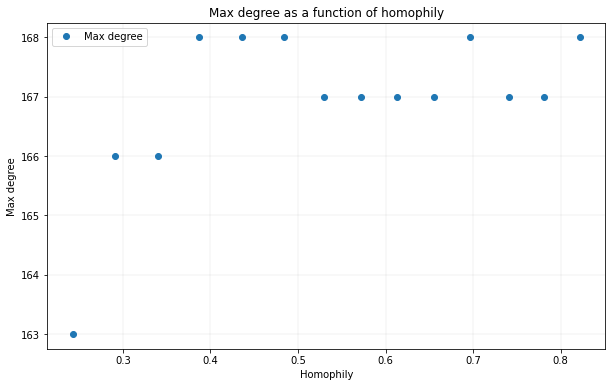

In [ ]:
plot_homophily_degree(g_synth_list,p=1)

In [ ]:
graph_summary(g_synth_list)

==================================================(GRAPH 1)==================================================
Eigenvalues:  [2.5097272, 2.6380582, 2.7183135, 3.0540025, 3.5142753, 3.7252936, 4.188419]
Leading Eigenvalue:  4.188418865203857
Mean Degree:  3.8980798721313477
Class Dist:  [0.12961595 0.08013294 0.15435746 0.30206794 0.15731166 0.11004432
 0.06646972]
Edge Homophily:  0.8098711967468262
Class Normalised Homophily:  0.8220469951629639
==================================================(GRAPH 2)==================================================
Eigenvalues:  [2.2894766, 2.465286, 2.4941456, 2.8368738, 3.330545, 3.532156, 4.1195292]
Leading Eigenvalue:  4.1195292472839355
Mean Degree:  3.8980798721313477
Class Dist:  [0.12961595 0.08013294 0.15435746 0.30206794 0.15731166 0.11004432
 0.06646972]
Edge Homophily:  0.7625047564506531
Class Normalised Homophily:  0.7815309166908264
==================================================(GRAPH 3)==========================================

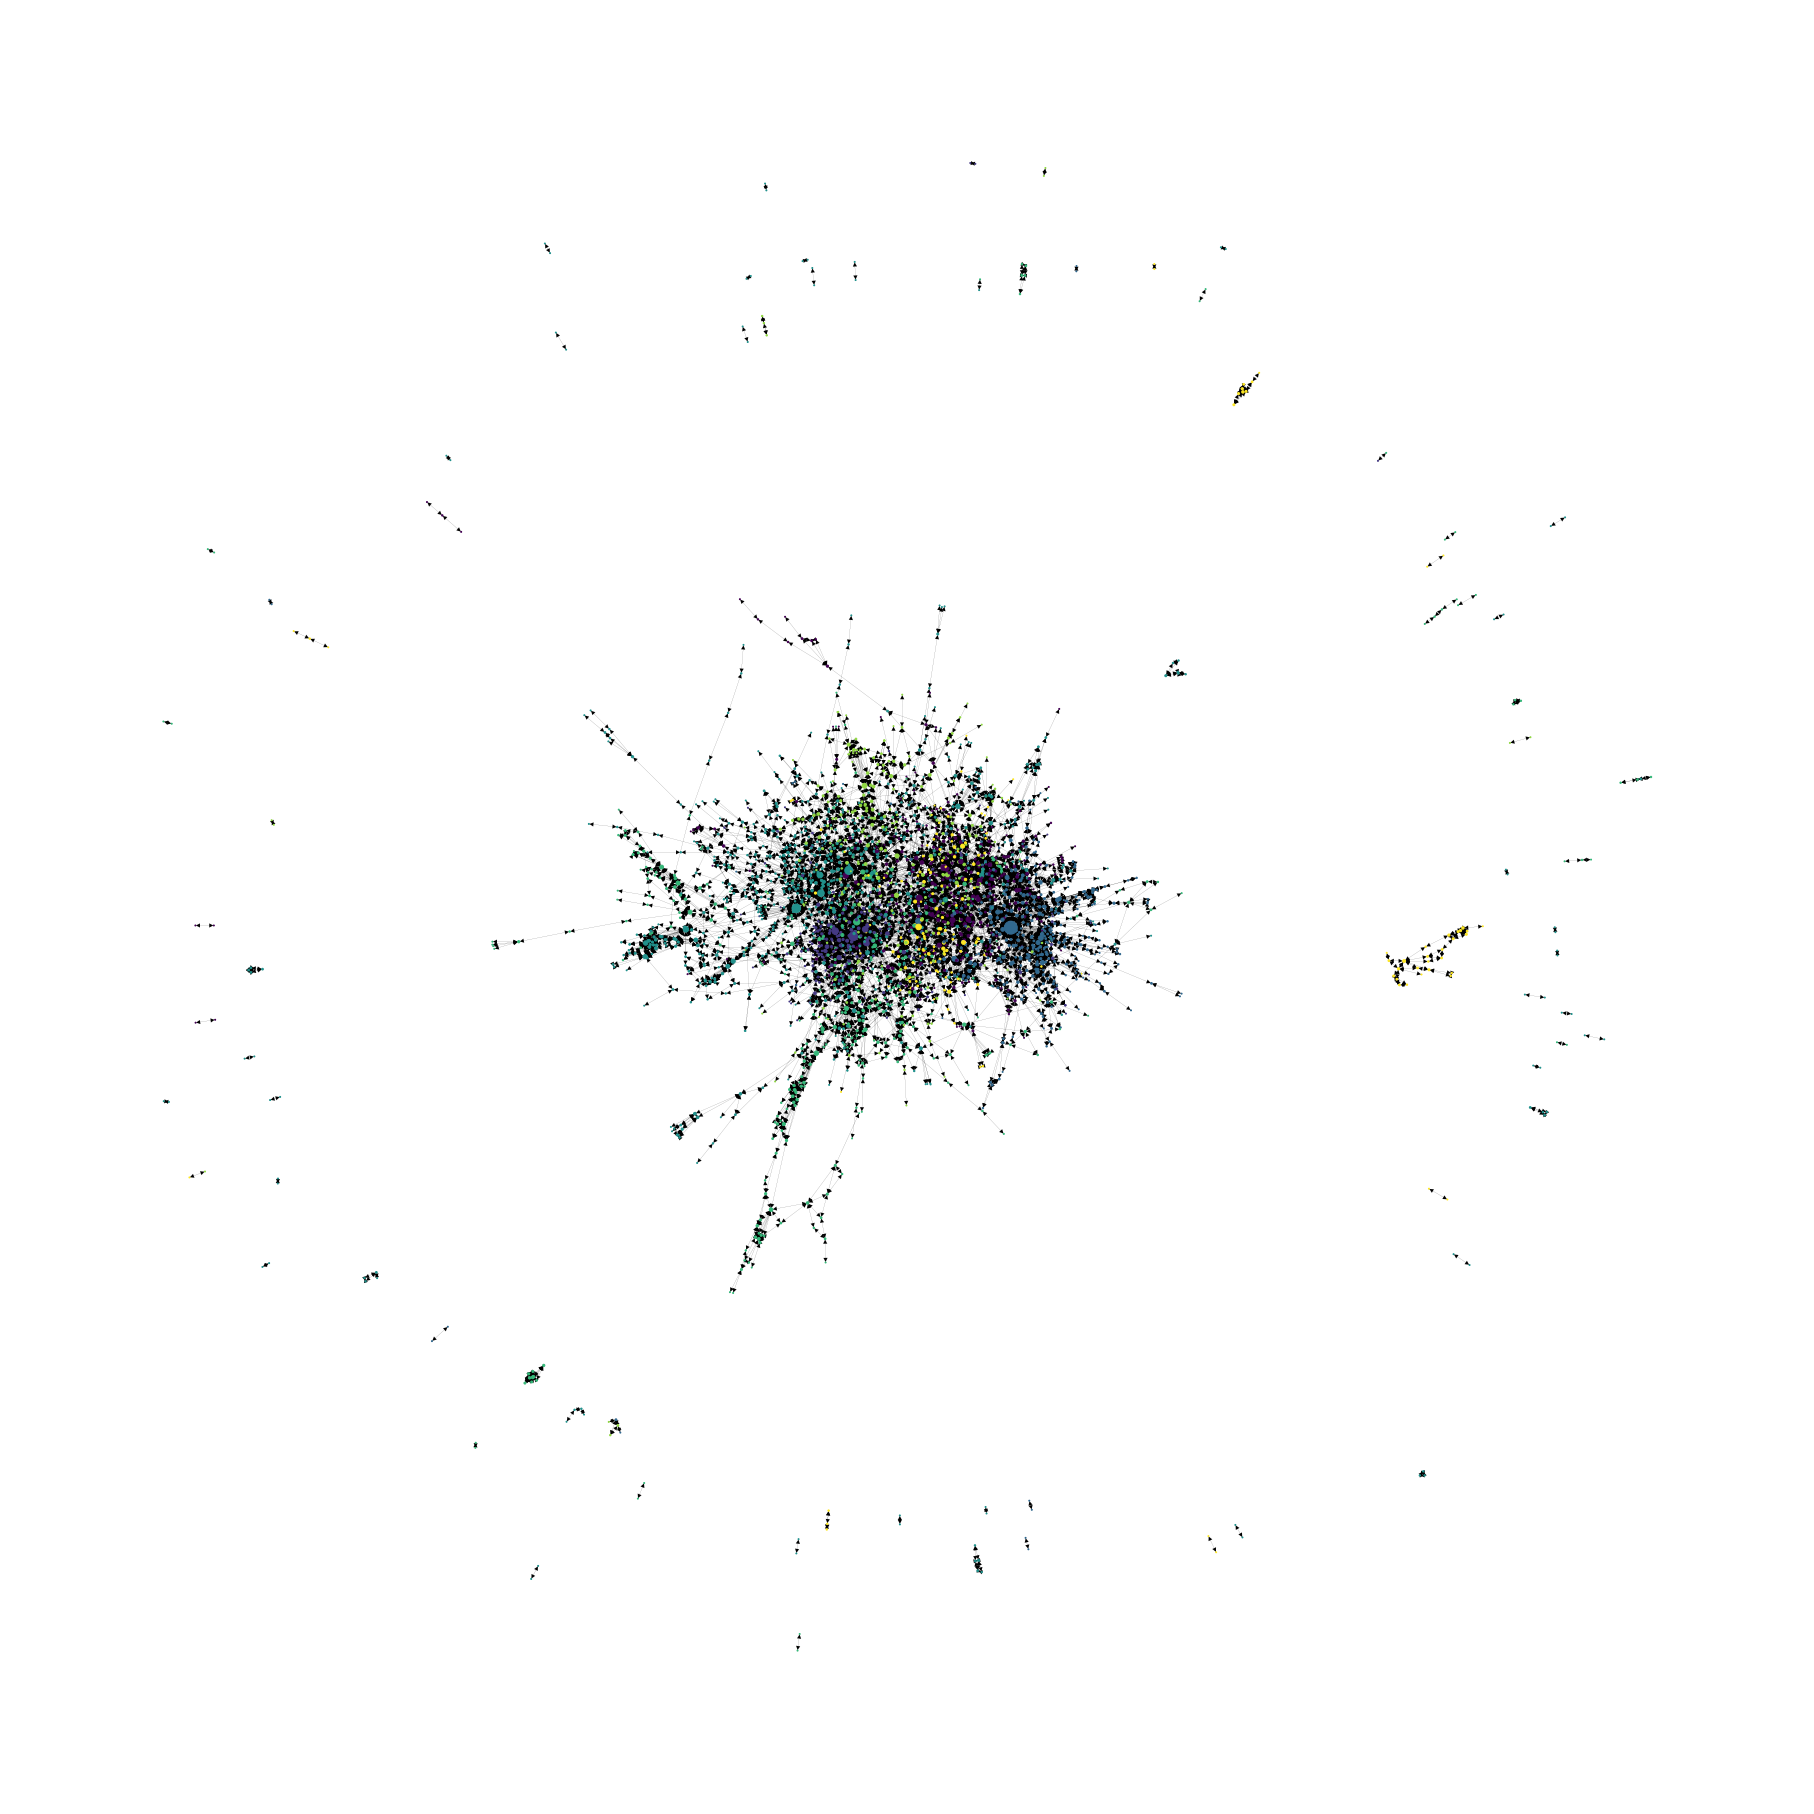

In [ ]:
plt.figure(1,figsize=(25,25))
g = g_synth_list[0]
nx.draw(g.to_networkx(), alpha = 1, node_size = g.in_degrees(), node_color = g.ndata['label'], width=0.05)
plt.show()

# P-Level Homophily

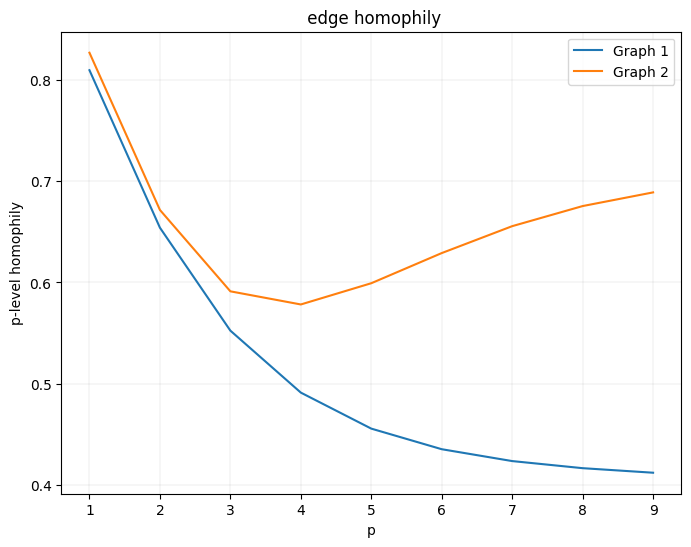

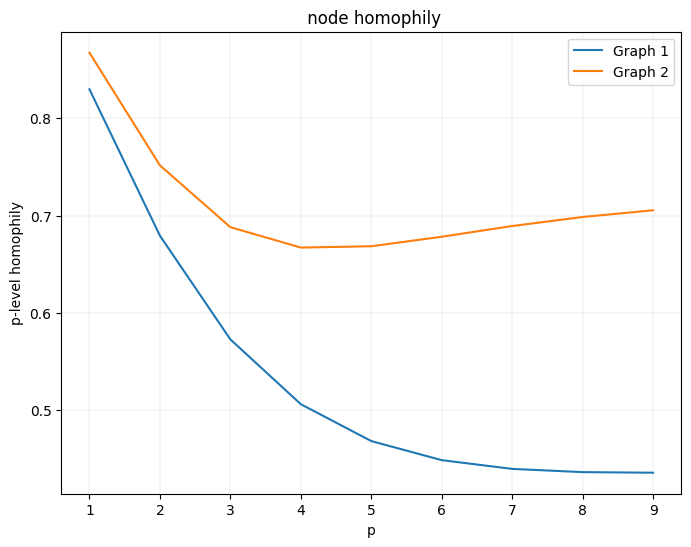

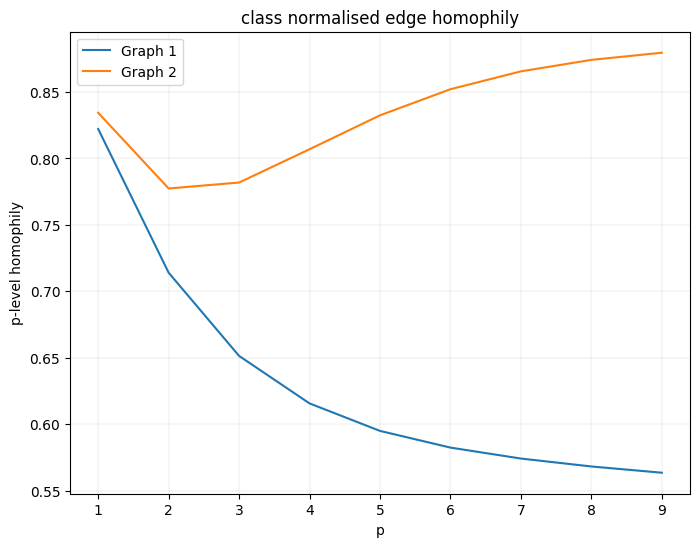

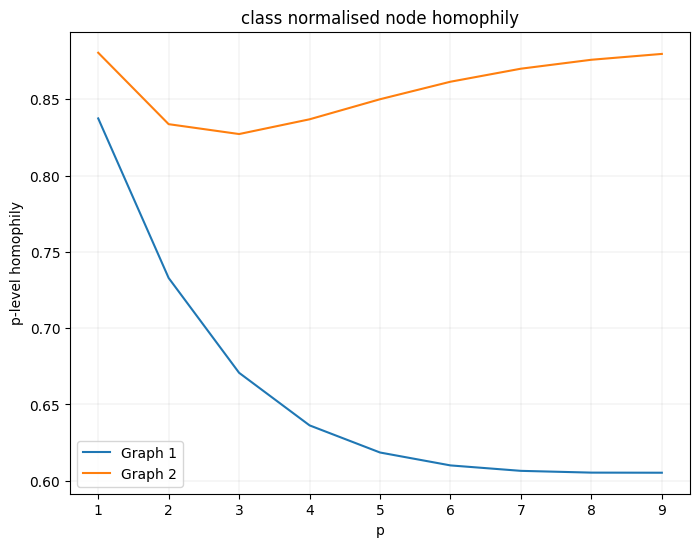

In [8]:
plot_p_level_homophily([g1,g4], homophily_type='edge')
plot_p_level_homophily([g1,g4], homophily_type='node')
plot_p_level_homophily([g1,g4], homophily_type='edge',class_normalised=True)
plot_p_level_homophily([g1,g4], homophily_type='node',class_normalised=True)


# Graph Summaries

In [ ]:
graph_summary([g0_homo,g0_hetero,g1,g2,g3,g4,g5])

==================================================(GRAPH 1)==================================================
Eigenvalues:  [5.0, 6.999999, 6.999999, 6.999999, 8.0, 9.0, 9.0, 10.999999, 11.999998, 15.0]
Leading Eigenvalue:  15.0
Mean Degree:  9.779999732971191
Class Dist:  [0.06 0.12 0.13 0.08 0.1  0.1  0.09 0.08 0.08 0.16]
Edge Homophily:  1.0
Class Normalised Homophily:  1.0
==================================================(GRAPH 2)==================================================
Eigenvalues:  [-15.000003, -13.606925, -11.437759, -10.000004, -10.000001, -9.235222, -8.252684, -6.346469, -5.21713, 89.0962]
Leading Eigenvalue:  89.09619903564453
Mean Degree:  89.0
Class Dist:  [0.15 0.08 0.09 0.1  0.06 0.1  0.1  0.05 0.12 0.15]
Edge Homophily:  0.0
Class Normalised Homophily:  0.0
==================================================(GRAPH 3)==================================================
Eigenvalues:  [2.5097375, 2.637981, 2.7183459, 3.0540445, 3.5139594, 3.7276642, 4.188745]
Leadin

# Run Simuations

In [62]:
g5_list,acc_list5,mean_spl_list5,mean_intra_spl_list5 = run_full_simulation(g5, mode='rewiring',num_saves=50,N_max=20000)

Generating synthetic graphs...
1/50) 0.20404461026191711
2/50) 0.21822893619537354
3/50) 0.23274290561676025
4/50) 0.2473585605621338
5/50) 0.2607518434524536
6/50) 0.27461954951286316
7/50) 0.28893694281578064
8/50) 0.3035984933376312
9/50) 0.3162213861942291
10/50) 0.33039912581443787
11/50) 0.3442762494087219
12/50) 0.358417809009552
13/50) 0.37260183691978455
14/50) 0.38712629675865173
15/50) 0.4016781747341156
16/50) 0.4152804911136627
17/50) 0.42924097180366516
18/50) 0.4430778920650482
19/50) 0.4567053020000458
20/50) 0.4700835645198822
21/50) 0.48396167159080505
22/50) 0.49755463004112244
23/50) 0.5108457207679749
24/50) 0.5243606567382812
25/50) 0.5381595492362976
26/50) 0.5517664551734924
27/50) 0.5651816129684448
28/50) 0.5789028406143188
29/50) 0.5923395156860352
30/50) 0.6059596538543701
31/50) 0.6194585561752319
32/50) 0.6331124305725098
33/50) 0.6462331414222717
34/50) 0.6596429944038391
35/50) 0.6730263829231262
36/50) 0.6864109039306641
37/50) 0.6992964148521423
38/50)

100%|██████████| 59/59 [02:10<00:00,  2.21s/it]


Calculating geodesics...


100%|██████████| 59/59 [1:01:57<00:00, 63.01s/it]


In [64]:
torch.save(g5_list,'g5_list_rewired')
torch.save(mean_spl_list5,'mean_spl_list5_rewired')
torch.save(mean_intra_spl_list5,'mean_intra_spl_list5_rewired')
torch.save(acc_list5,'acc_list5_rewired')

# Plot Simulation Results

In [65]:
g1_list = torch.load('g1_list')
mean_spl_list1 = torch.load('mean_spl_list1')
mean_intra_spl_list1 = torch.load('mean_intra_spl_list1')
acc_list1 = torch.load('acc_list1')

g1_r_list = torch.load('g1_list_rewired')
mean_spl_list1_r = torch.load('mean_spl_list1_rewired')
mean_intra_spl_list1_r = torch.load('mean_intra_spl_list1_rewired')
acc_list1_r = torch.load('acc_list1_rewired')

g5_list = torch.load('g5_list')
mean_spl_list5 = torch.load('mean_spl_list5')
mean_intra_spl_list5 = torch.load('mean_intra_spl_list5')
acc_list5 = torch.load('acc_list5')

g5_r_list = torch.load('g5_list_rewired')
mean_spl_list5_r = torch.load('mean_spl_list5_rewired')
mean_intra_spl_list5_r = torch.load('mean_intra_spl_list5_rewired')
acc_list5_r = torch.load('acc_list5_rewired')


## General Results

Cora Dataset (Homophilic Seed Graph)- SBM generated



100%|██████████| 1/1 [00:01<00:00,  1.75s/it]


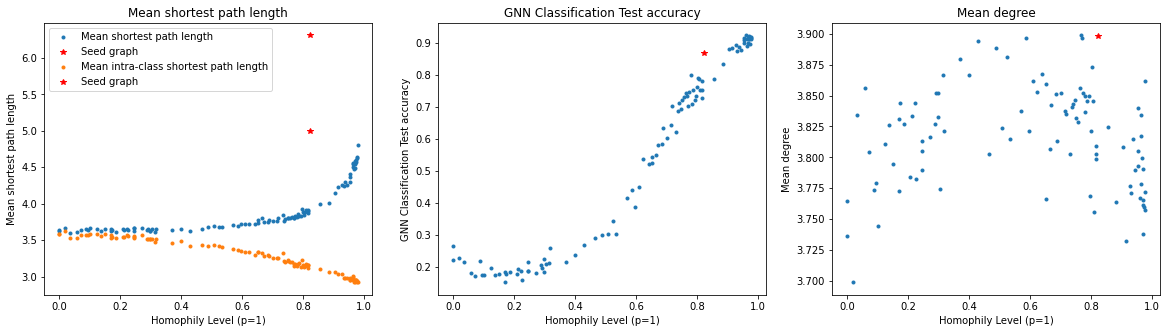

Actor Dataset (Heterophilic Seed Graph)- SBM generated



100%|██████████| 1/1 [00:02<00:00,  2.24s/it]


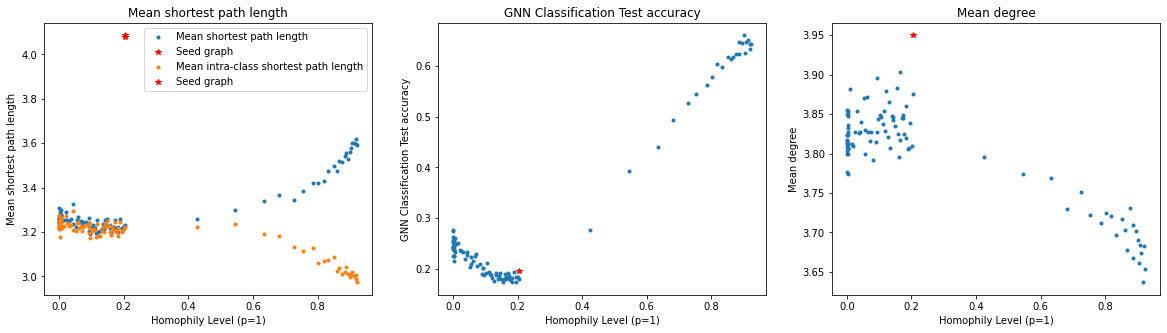

Cora Dataset (Homophilic Seed Graph)- Rewired



100%|██████████| 1/1 [00:01<00:00,  1.70s/it]


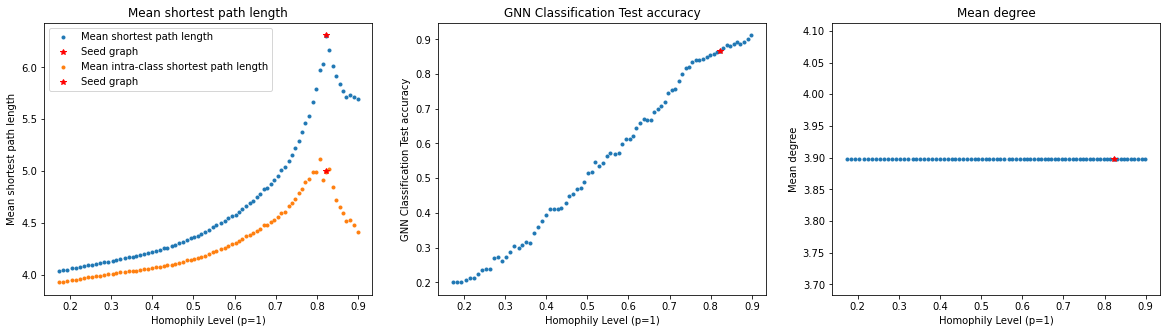

Cora Dataset (Homophilic Seed Graph)- Rewired



100%|██████████| 1/1 [00:02<00:00,  2.19s/it]


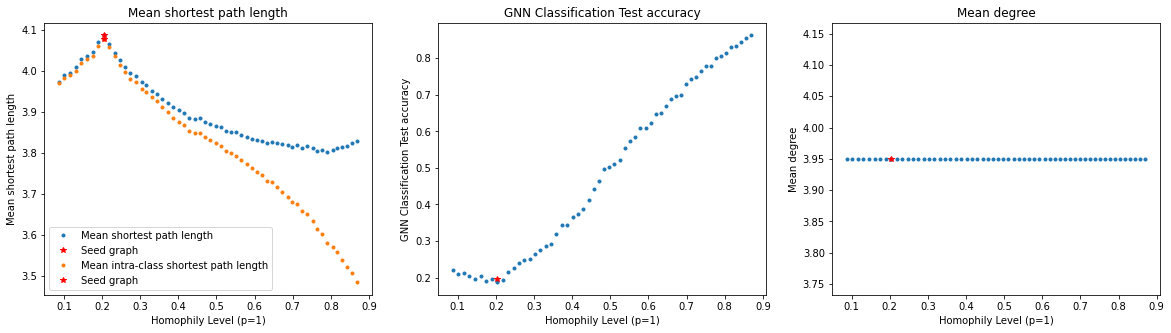

In [66]:
print('='*100)
print('Cora Dataset (Homophilic Seed Graph)- SBM generated')
print('='*100+'\n')
do_plots_compact(g1_list,g1,mean_spl_list1,mean_intra_spl_list1,acc_list1,p=1)

print('='*100)
print('Actor Dataset (Heterophilic Seed Graph)- SBM generated')
print('='*100+'\n')
do_plots_compact(g5_list,g5,mean_spl_list5,mean_intra_spl_list5,acc_list5,p=1)

print('='*100)
print('Cora Dataset (Homophilic Seed Graph)- Rewired')
print('='*100+'\n')
do_plots_compact(g1_r_list,g1,mean_spl_list1_r,mean_intra_spl_list1_r,acc_list1_r,p=1)

print('='*100)
print('Actor Dataset (Homophilic Seed Graph)- Rewired')
print('='*100+'\n')
do_plots_compact(g5_r_list,g5,mean_spl_list5_r,mean_intra_spl_list5_r,acc_list5_r,p=1)



## Intra-Class to Full SPL Ratio Plots

### Cora vs Actor Dataset (SBM generated)

100%|██████████| 1/1 [01:21<00:00, 81.29s/it]


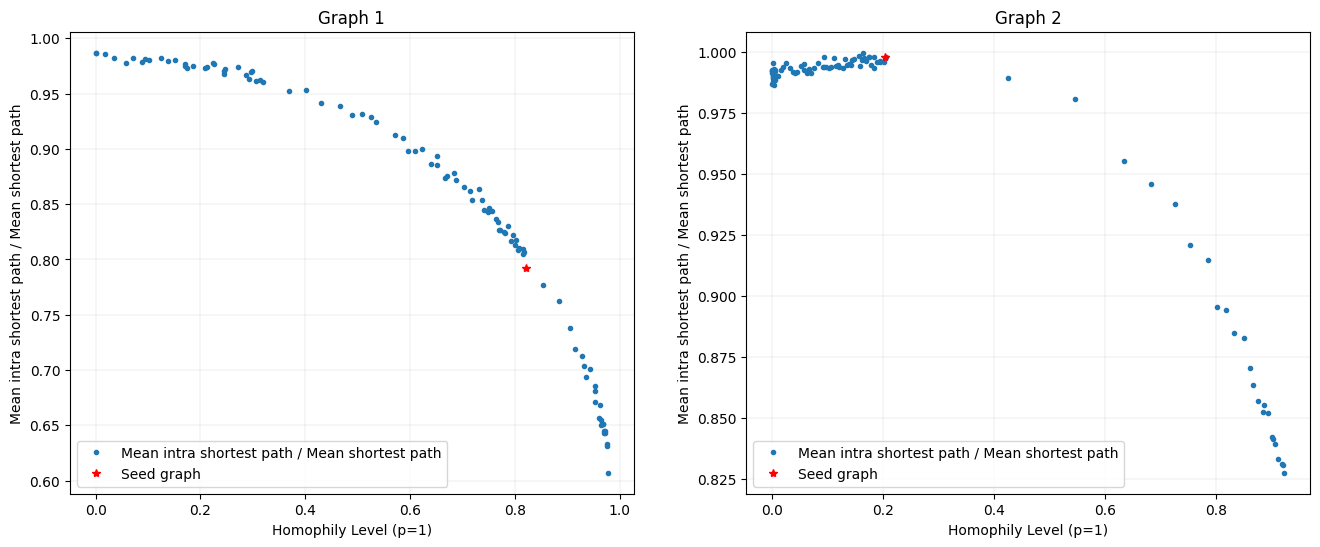

In [ ]:
plot_intra_full_spl_ratio_multiple([g1_list, g5_list], [g1,g5], [mean_spl_list1,mean_spl_list5], [mean_intra_spl_list1,mean_intra_spl_list5], p=1)

### Cora SBM Generated vs Graph Rewiring

100%|██████████| 1/1 [00:59<00:00, 59.66s/it]


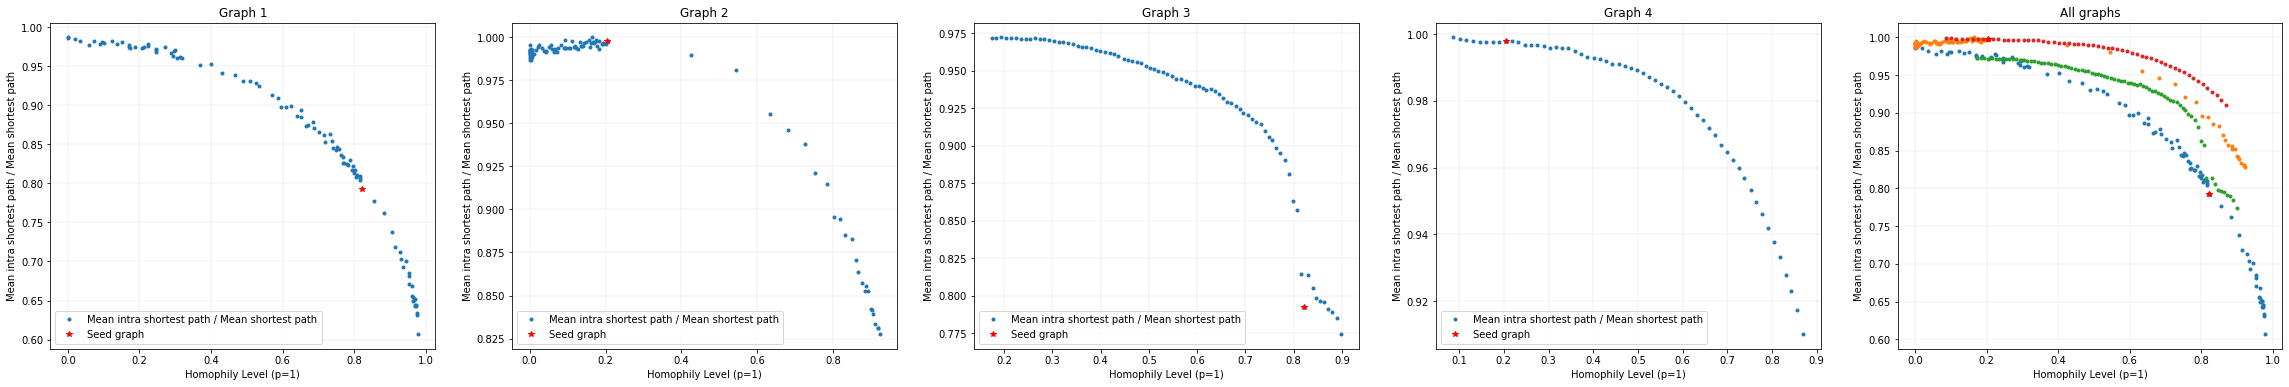

In [67]:
plot_intra_full_spl_ratio_multiple([g1_list,g5_list, g1_r_list,g5_r_list], 
                                   [g1,g5,g1,g5], 
                                   [mean_spl_list1,mean_spl_list5,mean_spl_list1_r,mean_spl_list5_r], 
                                   [mean_intra_spl_list1,mean_intra_spl_list5,mean_intra_spl_list1_r,mean_intra_spl_list5_r], p=1)

## Intra-Class to Full SPL Ratio vs GNN Accuracy

### Cora vs Actor

100%|██████████| 1/1 [00:02<00:00,  2.17s/it]


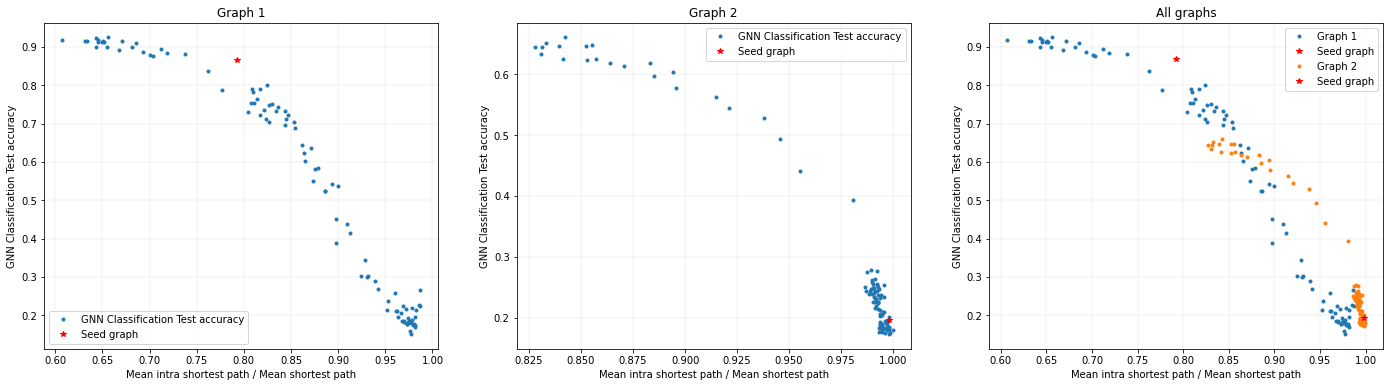

In [59]:
plot_spl_ratio_vs_gnn_acc_multiple([g1,g5], [mean_spl_list1,mean_spl_list5], [mean_intra_spl_list1,mean_intra_spl_list5], [acc_list1,acc_list5], p=1)

### Cora SBM vs Rewiring

100%|██████████| 1/1 [00:01<00:00,  1.68s/it]


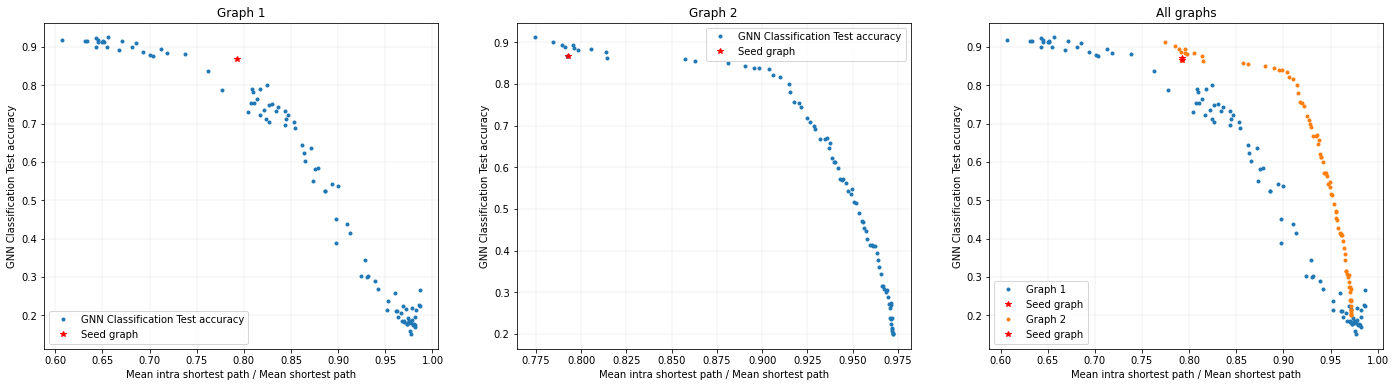

In [57]:
plot_spl_ratio_vs_gnn_acc_multiple([g1,g1], [mean_spl_list1,mean_spl_list1_r], [mean_intra_spl_list1,mean_intra_spl_list1_r],[acc_list1,acc_list1_r], p=1)

100%|██████████| 1/1 [00:02<00:00,  2.20s/it]


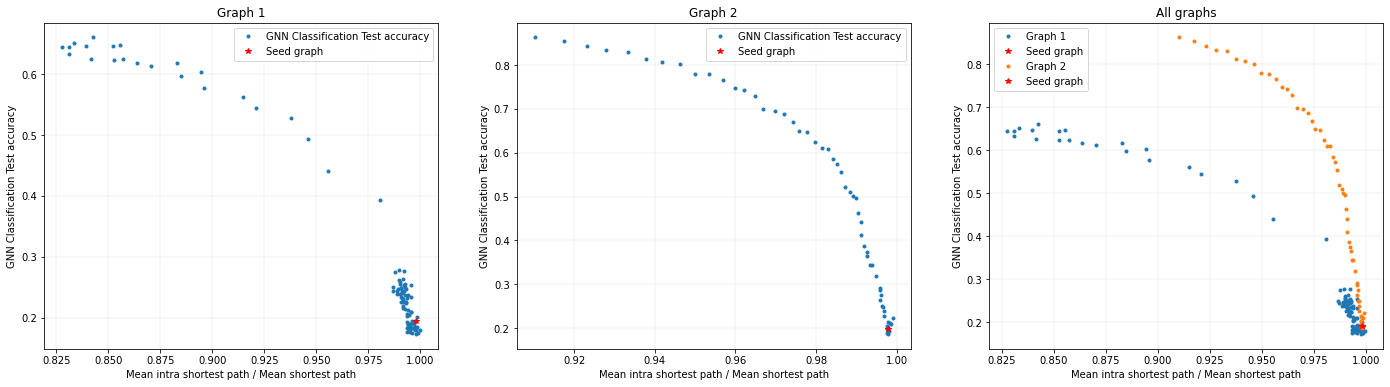

In [68]:
plot_spl_ratio_vs_gnn_acc_multiple([g5,g5], [mean_spl_list5,mean_spl_list5_r], [mean_intra_spl_list5,mean_intra_spl_list5_r],[acc_list5,acc_list5_r], p=1)